# Importanción de librerías 

In [1]:
import tensorflow as tf
import sklearn
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import librosa
from python_speech_features import mfcc

In [2]:
tf.test.is_gpu_available()

True

# Generación de ficheros

Esta función se encarga de generar un archivo txt de manera que este contenga 2 elementos por fila ('name_file','etiqueta') de esta manera permitirá poder entrenar la red.

In [3]:
import numpy as np
import os
def generate_file_data(dir,name):
    directory=dir
    #el nombre de los archivos posee el primer dígito en el nombre de esta forma permitirá etiquetarlos.
    a={'0':'cero','1':'uno','2':'dos','3':'tres','4':'cuatro','5':'cinco','6':'seis','7':'siete','8':'ocho','9':'nueve'}
    da=os.listdir(directory)
    # ordena los archivos
    da.sort()
    file = open(dir+name+'.txt',"w")
    for filename in da:
        if '.wav' in filename:
            file.write(filename+','+a[filename[0]]+'\n')
    file.close() 
    # genera el fichero
    with open(directory+'/'+name+'.txt') as f:
        read_data = f.read()
        f.closed
    read_data=read_data.split('\n')
    read_data=read_data[0:len(read_data)-1]
    return read_data

# Encoding words with One Hot Encoding

In [4]:
from sklearn.preprocessing import OneHotEncoder
vocabulary_words=np.array(['cero','uno','dos','tres','cuatro','cinco','seis','siete','ocho','nueve'])

In [5]:
onehot_encoder = OneHotEncoder(handle_unknown='ignore',categories='auto')

In [6]:
onehot_encoder

OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values=None, sparse=True)

In [7]:
vocabulary_words.reshape(-1,1)

array([['cero'],
       ['uno'],
       ['dos'],
       ['tres'],
       ['cuatro'],
       ['cinco'],
       ['seis'],
       ['siete'],
       ['ocho'],
       ['nueve']], dtype='<U6')

In [8]:
onehot_encoder.fit(X=vocabulary_words.reshape(-1,1))

OneHotEncoder(categorical_features=None, categories='auto',
       dtype=<class 'numpy.float64'>, handle_unknown='ignore',
       n_values=None, sparse=True)

In [9]:
onehot_encoder.categories_

[array(['cero', 'cinco', 'cuatro', 'dos', 'nueve', 'ocho', 'seis', 'siete',
        'tres', 'uno'], dtype='<U6')]

In [10]:
v=onehot_encoder.transform(vocabulary_words.reshape(-1,1)).toarray()

In [11]:
v

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [12]:
onehot_encoder.inverse_transform(v)

array([['cero'],
       ['uno'],
       ['dos'],
       ['tres'],
       ['cuatro'],
       ['cinco'],
       ['seis'],
       ['siete'],
       ['ocho'],
       ['nueve']], dtype='<U6')

In [13]:
def class_to_integer_encoded(n):# no srive
    return integer_encoded[n]

In [14]:
def encode(x):# tomará un array de string y lo transformada a encode
    return onehot_encoder.transform(x.reshape(-1,1)).toarray()

In [15]:
a=encode(np.array(['uno','dos']))

In [114]:
a

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]])

In [16]:
def decode(x):
    return onehot_encoder.inverse_transform(x)


In [17]:
decode(a)

array([['uno'],
       ['dos']], dtype='<U6')

In [18]:
def to_text(m,mfcc):
    label=m.predict_classes(mfcc)
    text=label_encoder.inverse_transform(label)
    text=text[0]
    return text

# MFCC 


In [19]:
def mfcc_features(DIR,list_dir):
    mfcc_audios=[]
    for dir in list_dir:
        wave, sr = librosa.load(DIR+dir, mono=True)
        features= librosa.feature.mfcc(wave, sr,n_mfcc=20)
        #features = sklearn.preprocessing.scale(features, axis=1)
        #features=sklearn.preprocessing.normalize(features,axis=1)
        try:
            features=np.pad(features,((0,0),(0,160-len(features[0]))),mode='constant', constant_values=0)
        except OSError as err:
            print(dir)
        mfcc_audios.append(features)
    mfcc_audios=np.array(mfcc_audios)
    return mfcc_audios

In [20]:
def prepare_data(dir,name):
    file = open(dir+name)
    f=file.read()
    file.close()
    f=f.split('\n')
    f=f[0:len(f)-1]
    labels=[]
    names_audios=[]
    for i in f:
        j=i.split(',')
        names_audios.append(j[0])
        labels.append(j[1])
    labels=np.array(labels)
    onehot= encode(labels)
    mfcc=mfcc_features(dir,names_audios)
    print(name+' OK')
    return mfcc,onehot



In [21]:
class dataset:
    def __init__(self,data):
        self.i=0#para el shuffle
        self.data_dir=data
        self.shuffle=None
        self.dir_training=data+'/training/'
        self.dir_test=data+'/test/'
        self.training_set=None
        self.test_set=None
    def split_dataset(self):
        generate_file_data(self.dir_training,name='training')
        generate_file_data(self.dir_test,name='test')
        self.training_set=prepare_data(self.dir_training,'training.txt')
        self.test_set=prepare_data(self.dir_test,'test.txt')

    

In [22]:
d=dataset('data')
d.split_dataset()

training.txt OK
test.txt OK


In [29]:
d.dir_test

'data/test/'

In [30]:
d.training_set

(array([[[-5.64680866e+02, -5.29639572e+02, -5.03711243e+02, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 1.31315456e+00,  3.83504027e+01,  5.91761157e+01, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 9.67559702e-01,  1.58076723e+01,  1.61406856e+01, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [-2.26318818e-01,  8.51022362e-01,  1.20597587e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [-8.17593134e-02,  3.73614388e+00, -2.09463672e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [-1.73113489e-01,  3.40531451e+00,  8.65122496e-01, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],
 
        [[-5.19092302e+02, -5.08130382e+02, -4.93961628e+02, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00,  1.31851391e+01,  2.85274192e+01, ...,
           0.00000000

In [31]:
len(d.training_set[0])

240

In [ ]:
#[d.training_set[0][i].shape for i in range(len(d.training_set[0]))] #will display numofcep

In [32]:
np.size(d.training_set[0])

768000

In [33]:
d.test_set[0]

array([[[-5.13639854e+02, -5.10511934e+02, -5.00494016e+02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  4.37834542e+00,  1.78571824e+01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  4.24387386e+00,  1.59164626e+01, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        ...,
        [ 0.00000000e+00, -2.63404490e+00, -3.65825454e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -2.90678541e+00, -3.80509903e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00, -3.10796143e+00, -3.31458643e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-6.28216153e+02, -6.02791031e+02, -5.98293685e+02, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 1.11749813e+02,  1.02410410e+02,  8.27195833e+01, ...,
          0.00000000e+00,  0.00000000e

In [34]:
d.test_set[1]

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Red neuronal 

In [35]:
trainX, trainY = d.training_set[0],d.training_set[1]
testX, testY = d.test_set[0],d.test_set[1]


In [36]:
import sklearn

In [37]:
trainX=np.matrix.transpose(trainX,[0,2,1])
testX=np.matrix.transpose(testX,[0,2,1])

In [38]:
trainX

array([[[-5.64680866e+02,  1.31315456e+00,  9.67559702e-01, ...,
         -2.26318818e-01, -8.17593134e-02, -1.73113489e-01],
        [-5.29639572e+02,  3.83504027e+01,  1.58076723e+01, ...,
          8.51022362e-01,  3.73614388e+00,  3.40531451e+00],
        [-5.03711243e+02,  5.91761157e+01,  1.61406856e+01, ...,
          1.20597587e+00, -2.09463672e+00,  8.65122496e-01],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-5.19092302e+02,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-5.08130382e+02,  1.31851391e+01,  7.17792662e+00, ...,
         -2.96481487e+00, -2.42184993e

In [39]:
testX

array([[[-5.13639854e+02,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [-5.10511934e+02,  4.37834542e+00,  4.24387386e+00, ...,
         -2.63404490e+00, -2.90678541e+00, -3.10796143e+00],
        [-5.00494016e+02,  1.78571824e+01,  1.59164626e+01, ...,
         -3.65825454e+00, -3.80509903e+00, -3.31458643e+00],
        ...,
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
        [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00]],

       [[-6.28216153e+02,  1.11749813e+02,  4.78110068e+01, ...,
          3.12890952e+00, -2.02561476e-01,  5.20885623e+00],
        [-6.02791031e+02,  1.02410410e+02,  2.46125923e+01, ...,
          3.49803786e+00, -3.10840482e

In [40]:
import tensorflow as tf
import time 
n_units=128
time_steps=160
n_inputs=20
batch_size=20
n_epochs=10
n_class=10

In [51]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(n_units, input_shape=(time_steps,n_inputs),return_sequences=True))
model.add(tf.keras.layers.Dropout(0.5))
#model.add(tf.keras)
model.add(tf.keras.layers.LSTM(n_units))#,return_sequences=True))
model.add(tf.layers.Dense(n_class, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [52]:
ti=time.time()
history=[]
for i in range(100):
    result=model.fit(trainX,trainY,batch_size=batch_size,epochs=n_epochs,validation_data=[testX,testY])
    model.save('Models/keras_2LSTM_Dropout')
    history.append(result)
tiempofinal=time.time()

Train on 240 samples, validate on 110 samples
Epoch 1/10
240/240 [==============================] - 7s 30ms/step - loss: 2.3059 - acc: 0.0667 - val_loss: 2.3028 - val_acc: 0.1000
Epoch 2/10
240/240 [==============================] - 6s 23ms/step - loss: 2.2983 - acc: 0.0917 - val_loss: 2.3028 - val_acc: 0.1091
Epoch 3/10
240/240 [==============================] - 6s 26ms/step - loss: 2.2956 - acc: 0.0708 - val_loss: 2.3029 - val_acc: 0.0909
Epoch 4/10
240/240 [==============================] - 7s 28ms/step - loss: 2.2886 - acc: 0.1125 - val_loss: 2.3041 - val_acc: 0.1000
Epoch 5/10
240/240 [==============================] - 10s 40ms/step - loss: 2.2880 - acc: 0.1208 - val_loss: 2.3036 - val_acc: 0.1091
Epoch 6/10
240/240 [==============================] - 7s 29ms/step - loss: 2.2831 - acc: 0.1125 - val_loss: 2.3050 - val_acc: 0.1000
Epoch 7/10
240/240 [==============================] - 7s 31ms/step - loss: 2.2811 - acc: 0.1125 - val_loss: 2.3056 - val_acc: 0.0909
Epoch 8/10
240/240 [==

240/240 [==============================] - 7s 30ms/step - loss: 1.3564 - acc: 0.3833 - val_loss: 1.3492 - val_acc: 0.4455
Train on 240 samples, validate on 110 samples
Epoch 1/10
240/240 [==============================] - 7s 30ms/step - loss: 1.4463 - acc: 0.3458 - val_loss: 1.3835 - val_acc: 0.3818
Epoch 2/10
240/240 [==============================] - 6s 25ms/step - loss: 1.3781 - acc: 0.3833 - val_loss: 1.4182 - val_acc: 0.4091
Epoch 3/10
240/240 [==============================] - 7s 29ms/step - loss: 1.2966 - acc: 0.4125 - val_loss: 1.4327 - val_acc: 0.3727
Epoch 4/10
240/240 [==============================] - 6s 26ms/step - loss: 1.3101 - acc: 0.4167 - val_loss: 1.4521 - val_acc: 0.3727
Epoch 5/10
240/240 [==============================] - 6s 25ms/step - loss: 1.3298 - acc: 0.4125 - val_loss: 1.7368 - val_acc: 0.3182
Epoch 6/10
240/240 [==============================] - 6s 25ms/step - loss: 1.5786 - acc: 0.2792 - val_loss: 1.6290 - val_acc: 0.3182
Epoch 7/10
240/240 [==============

240/240 [==============================] - 6s 27ms/step - loss: 1.0616 - acc: 0.5458 - val_loss: 1.2784 - val_acc: 0.4909
Epoch 10/10
240/240 [==============================] - 7s 27ms/step - loss: 1.0622 - acc: 0.4958 - val_loss: 1.3122 - val_acc: 0.4909
Train on 240 samples, validate on 110 samples
Epoch 1/10
240/240 [==============================] - 7s 28ms/step - loss: 0.9594 - acc: 0.5375 - val_loss: 1.4157 - val_acc: 0.5182
Epoch 2/10
240/240 [==============================] - 5s 23ms/step - loss: 1.0601 - acc: 0.5583 - val_loss: 1.3910 - val_acc: 0.4727
Epoch 3/10
240/240 [==============================] - 6s 25ms/step - loss: 1.3695 - acc: 0.4833 - val_loss: 1.8170 - val_acc: 0.3727
Epoch 4/10
240/240 [==============================] - 7s 30ms/step - loss: 1.3659 - acc: 0.4792 - val_loss: 1.6443 - val_acc: 0.3455
Epoch 5/10
240/240 [==============================] - 10s 43ms/step - loss: 1.2925 - acc: 0.4417 - val_loss: 1.3032 - val_acc: 0.5545
Epoch 6/10
240/240 [============

240/240 [==============================] - 6s 24ms/step - loss: 1.1203 - acc: 0.5542 - val_loss: 1.2715 - val_acc: 0.4909
Epoch 9/10
240/240 [==============================] - 6s 24ms/step - loss: 1.0479 - acc: 0.5875 - val_loss: 1.2075 - val_acc: 0.5273
Epoch 10/10
240/240 [==============================] - 6s 24ms/step - loss: 1.0026 - acc: 0.6417 - val_loss: 1.1944 - val_acc: 0.5091
Train on 240 samples, validate on 110 samples
Epoch 1/10
240/240 [==============================] - 5s 23ms/step - loss: 0.9751 - acc: 0.6125 - val_loss: 1.1928 - val_acc: 0.5273
Epoch 2/10
240/240 [==============================] - 6s 23ms/step - loss: 0.9650 - acc: 0.6458 - val_loss: 1.1879 - val_acc: 0.5727
Epoch 3/10
240/240 [==============================] - 6s 24ms/step - loss: 0.9099 - acc: 0.6667 - val_loss: 1.1842 - val_acc: 0.6091
Epoch 4/10
240/240 [==============================] - 7s 28ms/step - loss: 0.9013 - acc: 0.6917 - val_loss: 1.3084 - val_acc: 0.5364
Epoch 5/10
240/240 [=============

240/240 [==============================] - 8s 32ms/step - loss: 0.5356 - acc: 0.8167 - val_loss: 0.9205 - val_acc: 0.7000
Epoch 8/10
240/240 [==============================] - 8s 34ms/step - loss: 0.4996 - acc: 0.8292 - val_loss: 0.9446 - val_acc: 0.7000
Epoch 9/10
240/240 [==============================] - 7s 30ms/step - loss: 0.5215 - acc: 0.8125 - val_loss: 0.9616 - val_acc: 0.7000
Epoch 10/10
240/240 [==============================] - 8s 33ms/step - loss: 0.5137 - acc: 0.8208 - val_loss: 0.9240 - val_acc: 0.7545
Train on 240 samples, validate on 110 samples
Epoch 1/10
240/240 [==============================] - 8s 32ms/step - loss: 0.6382 - acc: 0.7875 - val_loss: 0.9228 - val_acc: 0.7091
Epoch 2/10
240/240 [==============================] - 8s 32ms/step - loss: 0.6170 - acc: 0.7792 - val_loss: 0.9237 - val_acc: 0.7455
Epoch 3/10
240/240 [==============================] - 7s 29ms/step - loss: 0.5198 - acc: 0.8458 - val_loss: 0.8744 - val_acc: 0.7455
Epoch 4/10
240/240 [=============

240/240 [==============================] - 5s 23ms/step - loss: 0.2966 - acc: 0.8792 - val_loss: 0.8744 - val_acc: 0.7364
Epoch 7/10
240/240 [==============================] - 6s 24ms/step - loss: 0.3270 - acc: 0.8667 - val_loss: 0.9406 - val_acc: 0.7636
Epoch 8/10
240/240 [==============================] - 6s 25ms/step - loss: 0.3103 - acc: 0.8833 - val_loss: 0.9657 - val_acc: 0.7364
Epoch 9/10
240/240 [==============================] - 6s 24ms/step - loss: 0.3195 - acc: 0.8792 - val_loss: 0.8489 - val_acc: 0.7727
Epoch 10/10
240/240 [==============================] - 6s 23ms/step - loss: 0.2781 - acc: 0.9000 - val_loss: 0.8000 - val_acc: 0.7636
Train on 240 samples, validate on 110 samples
Epoch 1/10
240/240 [==============================] - 7s 30ms/step - loss: 0.2421 - acc: 0.9208 - val_loss: 0.8093 - val_acc: 0.8091
Epoch 2/10
240/240 [==============================] - 7s 30ms/step - loss: 0.2289 - acc: 0.9292 - val_loss: 0.8455 - val_acc: 0.8091
Epoch 3/10
240/240 [=============

240/240 [==============================] - 7s 28ms/step - loss: 0.0438 - acc: 0.9875 - val_loss: 0.8242 - val_acc: 0.8182
Epoch 6/10
240/240 [==============================] - 6s 26ms/step - loss: 0.0529 - acc: 0.9875 - val_loss: 0.8049 - val_acc: 0.8273
Epoch 7/10
240/240 [==============================] - 6s 24ms/step - loss: 0.0789 - acc: 0.9792 - val_loss: 0.8283 - val_acc: 0.8455
Epoch 8/10
240/240 [==============================] - 6s 25ms/step - loss: 0.0744 - acc: 0.9833 - val_loss: 0.8725 - val_acc: 0.8273
Epoch 9/10
240/240 [==============================] - 6s 26ms/step - loss: 0.0584 - acc: 0.9833 - val_loss: 0.8570 - val_acc: 0.8182
Epoch 10/10
240/240 [==============================] - 6s 25ms/step - loss: 0.0732 - acc: 0.9833 - val_loss: 0.9241 - val_acc: 0.8182
Train on 240 samples, validate on 110 samples
Epoch 1/10
240/240 [==============================] - 6s 26ms/step - loss: 0.1099 - acc: 0.9667 - val_loss: 0.8774 - val_acc: 0.8182
Epoch 2/10
240/240 [=============

240/240 [==============================] - 5s 23ms/step - loss: 0.0414 - acc: 0.9875 - val_loss: 0.6877 - val_acc: 0.8364
Epoch 5/10
240/240 [==============================] - 5s 23ms/step - loss: 0.0387 - acc: 0.9875 - val_loss: 0.6780 - val_acc: 0.8455
Epoch 6/10
240/240 [==============================] - 5s 23ms/step - loss: 0.0386 - acc: 0.9875 - val_loss: 0.7158 - val_acc: 0.8364
Epoch 7/10
240/240 [==============================] - 5s 23ms/step - loss: 0.0508 - acc: 0.9792 - val_loss: 0.7358 - val_acc: 0.8273
Epoch 8/10
240/240 [==============================] - 6s 23ms/step - loss: 0.0346 - acc: 0.9917 - val_loss: 0.7757 - val_acc: 0.8273
Epoch 9/10
240/240 [==============================] - 6s 24ms/step - loss: 0.0486 - acc: 0.9833 - val_loss: 0.7978 - val_acc: 0.8182
Epoch 10/10
240/240 [==============================] - 6s 26ms/step - loss: 0.0342 - acc: 0.9917 - val_loss: 0.8054 - val_acc: 0.8273
Train on 240 samples, validate on 110 samples
Epoch 1/10
240/240 [=============

240/240 [==============================] - 8s 35ms/step - loss: 0.0508 - acc: 0.9875 - val_loss: 0.6388 - val_acc: 0.8636
Epoch 4/10
240/240 [==============================] - 8s 34ms/step - loss: 0.0522 - acc: 0.9833 - val_loss: 0.6660 - val_acc: 0.8455
Epoch 5/10
240/240 [==============================] - 8s 35ms/step - loss: 0.0492 - acc: 0.9833 - val_loss: 0.6520 - val_acc: 0.8636
Epoch 6/10
240/240 [==============================] - 8s 34ms/step - loss: 0.0654 - acc: 0.9792 - val_loss: 0.6584 - val_acc: 0.8545
Epoch 7/10
240/240 [==============================] - 8s 35ms/step - loss: 0.0784 - acc: 0.9750 - val_loss: 0.6675 - val_acc: 0.8455
Epoch 8/10
240/240 [==============================] - 7s 29ms/step - loss: 0.0564 - acc: 0.9750 - val_loss: 0.6575 - val_acc: 0.8636
Epoch 9/10
240/240 [==============================] - 6s 24ms/step - loss: 0.0808 - acc: 0.9667 - val_loss: 0.6675 - val_acc: 0.8455
Epoch 10/10
240/240 [==============================] - 6s 25ms/step - loss: 0.08

240/240 [==============================] - 8s 33ms/step - loss: 0.0346 - acc: 0.9875 - val_loss: 0.7051 - val_acc: 0.8364
Epoch 3/10
240/240 [==============================] - 9s 36ms/step - loss: 0.0228 - acc: 0.9917 - val_loss: 0.6955 - val_acc: 0.8364
Epoch 4/10
240/240 [==============================] - 7s 30ms/step - loss: 0.0246 - acc: 0.9917 - val_loss: 0.7141 - val_acc: 0.8545
Epoch 5/10
240/240 [==============================] - 7s 30ms/step - loss: 0.0249 - acc: 0.9875 - val_loss: 0.7235 - val_acc: 0.8455
Epoch 6/10
240/240 [==============================] - 8s 35ms/step - loss: 0.0183 - acc: 0.9958 - val_loss: 0.7279 - val_acc: 0.8545
Epoch 7/10
240/240 [==============================] - 10s 42ms/step - loss: 0.0175 - acc: 0.9875 - val_loss: 0.7253 - val_acc: 0.8545
Epoch 8/10
240/240 [==============================] - 7s 30ms/step - loss: 0.0247 - acc: 0.9875 - val_loss: 0.7027 - val_acc: 0.8455
Epoch 9/10
240/240 [==============================] - 6s 26ms/step - loss: 0.03

240/240 [==============================] - 8s 31ms/step - loss: 0.1310 - acc: 0.9625 - val_loss: 0.6746 - val_acc: 0.8545
Epoch 2/10
240/240 [==============================] - 8s 32ms/step - loss: 0.1100 - acc: 0.9792 - val_loss: 0.6520 - val_acc: 0.8636
Epoch 3/10
240/240 [==============================] - 7s 31ms/step - loss: 0.0644 - acc: 0.9875 - val_loss: 0.6859 - val_acc: 0.8545
Epoch 4/10
240/240 [==============================] - 8s 32ms/step - loss: 0.0547 - acc: 0.9875 - val_loss: 0.7650 - val_acc: 0.8273
Epoch 5/10
240/240 [==============================] - 8s 32ms/step - loss: 0.0570 - acc: 0.9875 - val_loss: 0.7513 - val_acc: 0.8364
Epoch 6/10
240/240 [==============================] - 7s 31ms/step - loss: 0.0283 - acc: 0.9917 - val_loss: 0.7104 - val_acc: 0.8545
Epoch 7/10
240/240 [==============================] - 8s 32ms/step - loss: 0.0464 - acc: 0.9875 - val_loss: 0.7134 - val_acc: 0.8455
Epoch 8/10
240/240 [==============================] - 7s 31ms/step - loss: 0.023

Train on 240 samples, validate on 110 samples
Epoch 1/10
240/240 [==============================] - 8s 34ms/step - loss: 0.0085 - acc: 0.9958 - val_loss: 0.8465 - val_acc: 0.8727
Epoch 2/10
240/240 [==============================] - 8s 32ms/step - loss: 0.0085 - acc: 0.9958 - val_loss: 0.8533 - val_acc: 0.8727
Epoch 3/10
240/240 [==============================] - 6s 26ms/step - loss: 0.0084 - acc: 0.9917 - val_loss: 0.8535 - val_acc: 0.8727
Epoch 4/10
240/240 [==============================] - 6s 25ms/step - loss: 0.0089 - acc: 0.9958 - val_loss: 0.8521 - val_acc: 0.8727
Epoch 5/10
240/240 [==============================] - 6s 25ms/step - loss: 0.0326 - acc: 0.9917 - val_loss: 0.8546 - val_acc: 0.8636
Epoch 6/10
240/240 [==============================] - 6s 24ms/step - loss: 0.0071 - acc: 0.9958 - val_loss: 0.8530 - val_acc: 0.8727
Epoch 7/10
240/240 [==============================] - 6s 23ms/step - loss: 0.0148 - acc: 0.9917 - val_loss: 0.7963 - val_acc: 0.8727
Epoch 8/10
240/240 [===

240/240 [==============================] - 7s 27ms/step - loss: 0.1714 - acc: 0.9583 - val_loss: 0.5733 - val_acc: 0.8727
Train on 240 samples, validate on 110 samples
Epoch 1/10
240/240 [==============================] - 7s 29ms/step - loss: 0.1541 - acc: 0.9583 - val_loss: 0.5631 - val_acc: 0.8727
Epoch 2/10
240/240 [==============================] - 10s 40ms/step - loss: 0.1927 - acc: 0.9458 - val_loss: 0.7239 - val_acc: 0.8273
Epoch 3/10
240/240 [==============================] - 8s 34ms/step - loss: 0.2729 - acc: 0.9417 - val_loss: 0.8046 - val_acc: 0.8182
Epoch 4/10
240/240 [==============================] - 8s 33ms/step - loss: 0.2061 - acc: 0.9458 - val_loss: 0.6212 - val_acc: 0.8545
Epoch 5/10
240/240 [==============================] - 8s 32ms/step - loss: 0.1328 - acc: 0.9625 - val_loss: 0.5221 - val_acc: 0.8909
Epoch 6/10
240/240 [==============================] - 8s 31ms/step - loss: 0.0634 - acc: 0.9792 - val_loss: 0.4730 - val_acc: 0.8636
Epoch 7/10
240/240 [=============

240/240 [==============================] - 7s 27ms/step - loss: 0.0883 - acc: 0.9708 - val_loss: 0.6724 - val_acc: 0.8818
Epoch 10/10
240/240 [==============================] - 7s 28ms/step - loss: 0.0799 - acc: 0.9792 - val_loss: 0.6069 - val_acc: 0.9000
Train on 240 samples, validate on 110 samples
Epoch 1/10
240/240 [==============================] - 6s 26ms/step - loss: 0.0129 - acc: 0.9917 - val_loss: 0.6194 - val_acc: 0.8727
Epoch 2/10
240/240 [==============================] - 6s 26ms/step - loss: 0.0326 - acc: 0.9792 - val_loss: 0.7105 - val_acc: 0.8727
Epoch 3/10
240/240 [==============================] - 6s 25ms/step - loss: 0.0337 - acc: 0.9875 - val_loss: 0.7255 - val_acc: 0.8636
Epoch 4/10
240/240 [==============================] - 6s 25ms/step - loss: 0.0781 - acc: 0.9708 - val_loss: 0.7725 - val_acc: 0.8455
Epoch 5/10
240/240 [==============================] - 6s 24ms/step - loss: 0.0805 - acc: 0.9833 - val_loss: 0.8701 - val_acc: 0.8273
Epoch 6/10
240/240 [=============

240/240 [==============================] - 6s 25ms/step - loss: 0.0436 - acc: 0.9875 - val_loss: 1.0962 - val_acc: 0.8091
Epoch 9/10
240/240 [==============================] - 6s 26ms/step - loss: 0.0385 - acc: 0.9833 - val_loss: 1.0092 - val_acc: 0.8182
Epoch 10/10
240/240 [==============================] - 7s 28ms/step - loss: 0.0241 - acc: 0.9917 - val_loss: 0.8916 - val_acc: 0.8273
Train on 240 samples, validate on 110 samples
Epoch 1/10
240/240 [==============================] - 6s 27ms/step - loss: 0.0185 - acc: 0.9958 - val_loss: 0.8052 - val_acc: 0.8273
Epoch 2/10
240/240 [==============================] - 6s 25ms/step - loss: 0.0249 - acc: 0.9917 - val_loss: 0.7154 - val_acc: 0.8545
Epoch 3/10
240/240 [==============================] - 6s 24ms/step - loss: 0.0183 - acc: 0.9875 - val_loss: 0.8092 - val_acc: 0.8545
Epoch 4/10
240/240 [==============================] - 6s 24ms/step - loss: 0.0362 - acc: 0.9875 - val_loss: 0.8882 - val_acc: 0.8364
Epoch 5/10
240/240 [=============

240/240 [==============================] - 6s 25ms/step - loss: 0.0089 - acc: 0.9917 - val_loss: 0.9180 - val_acc: 0.8545
Epoch 8/10
240/240 [==============================] - 6s 25ms/step - loss: 0.0077 - acc: 0.9958 - val_loss: 0.9363 - val_acc: 0.8455
Epoch 9/10
240/240 [==============================] - 6s 24ms/step - loss: 0.0165 - acc: 0.9875 - val_loss: 0.9937 - val_acc: 0.8364
Epoch 10/10
240/240 [==============================] - 6s 25ms/step - loss: 0.0252 - acc: 0.9917 - val_loss: 0.9768 - val_acc: 0.8545
Train on 240 samples, validate on 110 samples
Epoch 1/10
240/240 [==============================] - 6s 24ms/step - loss: 0.0114 - acc: 0.9958 - val_loss: 0.9942 - val_acc: 0.8545
Epoch 2/10
240/240 [==============================] - 6s 24ms/step - loss: 0.0079 - acc: 0.9958 - val_loss: 1.0015 - val_acc: 0.8545
Epoch 3/10
240/240 [==============================] - 5s 22ms/step - loss: 0.0085 - acc: 0.9958 - val_loss: 0.9993 - val_acc: 0.8545
Epoch 4/10
240/240 [=============

240/240 [==============================] - 5s 23ms/step - loss: 0.0078 - acc: 0.9958 - val_loss: 0.9263 - val_acc: 0.8545
Epoch 7/10
240/240 [==============================] - 5s 23ms/step - loss: 0.0071 - acc: 0.9958 - val_loss: 0.9152 - val_acc: 0.8636
Epoch 8/10
240/240 [==============================] - 5s 22ms/step - loss: 0.0058 - acc: 1.0000 - val_loss: 0.9066 - val_acc: 0.8636
Epoch 9/10
240/240 [==============================] - 5s 22ms/step - loss: 0.0073 - acc: 0.9917 - val_loss: 0.9039 - val_acc: 0.8636
Epoch 10/10
240/240 [==============================] - 5s 22ms/step - loss: 0.0094 - acc: 0.9917 - val_loss: 0.8245 - val_acc: 0.8727
Train on 240 samples, validate on 110 samples
Epoch 1/10
240/240 [==============================] - 5s 23ms/step - loss: 0.0069 - acc: 0.9958 - val_loss: 0.8223 - val_acc: 0.8727
Epoch 2/10
240/240 [==============================] - 5s 23ms/step - loss: 0.0393 - acc: 0.9917 - val_loss: 0.8498 - val_acc: 0.8909
Epoch 3/10
240/240 [=============

In [43]:
print((tiempofinal-ti)/60)

46.39026056130727


In [45]:
type(result)

tensorflow.python.keras.callbacks.History

In [46]:
import json
# Get the dictionary containing each metric and the loss for each epoch
r = result.history
# Save it under the form of a json file
json.dump(r, open('Models/Results/LSTM_simple', 'w'))

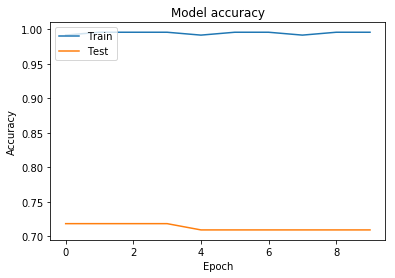

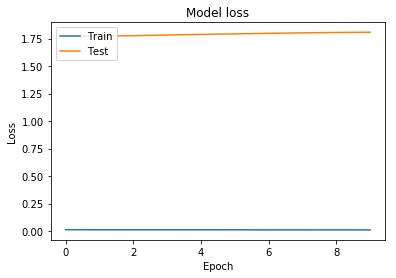

In [48]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [39]:
trainX[0]

array([[-0.91332112, -1.20854392, -0.19381587, ...,  0.09185654,
         0.4319833 ,  0.45809148],
       [-0.88884379, -1.11266398, -0.04986061, ..., -0.4501449 ,
         0.08398442, -0.00812885],
       [-0.81044921, -0.81749539,  0.34608203, ..., -0.66089419,
        -0.02356124, -0.03912434],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [113]:
y=model.predict([[trainX[0]]])

In [112]:
model.predict([[trainX[0]]])

array([[0.09945323, 0.0985247 , 0.09981292, 0.09982746, 0.10115309,
        0.09877511, 0.09959589, 0.10086489, 0.10064428, 0.10134849]],
      dtype=float32)

In [116]:
label_encoder.inverse_transform([0])

array(['cero'], dtype='<U6')

In [117]:
to_text(model,[[trainX[0]]])

'cero'

In [118]:
y

array([[8.5458267e-01, 1.3367206e-05, 1.1010848e-04, 1.2222943e-06,
        1.5461472e-05, 3.2351786e-04, 6.4432106e-06, 1.4490633e-01,
        3.8986556e-05, 1.9558286e-06]], dtype=float32)

In [182]:
trainY[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.])

In [120]:
class_result=y[0]>=y[0][np.argmax(y,axis=-1)]

In [192]:
y[0][9]

0.8600664

In [121]:
class_result

array([ True, False, False, False, False, False, False, False, False,
       False])

In [122]:
decode([class_result])

array(['cero'], dtype='<U6')

In [202]:
class_result=class_result.astype('int')

TypeError: predict_proba() missing 1 required positional argument: 'x'

In [229]:
import librosa
wave, sr = librosa.load('data/test/6_seg_v1.wav', mono=True)
features= librosa.feature.mfcc(wave, sr,n_mfcc=20)

In [230]:
wave

array([-1.0500123e-08,  1.5895614e-08, -2.1860259e-08, ...,
        8.4779126e-04,  6.8931724e-04,  7.1130751e-04], dtype=float32)

In [231]:
features = sklearn.preprocessing.scale(features, axis=1)
features=np.pad(features,((0,0),(0,160-len(features[0]))),mode='constant', constant_values=0)

In [232]:
f=np.matrix.transpose(np.array([features]),[0,2,1])

In [233]:
predict=m.predict_classes(f)

In [235]:
decode(np.eye(10)[predict])

array([['dos']], dtype='<U6')

In [78]:
np.argmax(predict)

3

In [220]:
label_encoder.inverse_transform(label)

array(['three'], dtype='<U5')

In [225]:
to_text(m,f)

'three'

# Load Model 

In [243]:
import tensorflow as tf
m=tf.keras.models.load_model('Models/keras_training')

In [4]:
from keras.utils import plot_model
plot_model(m, to_file='model.png')

In [244]:
m.predict_classes([[trainX[0]]])

array([0])

# Recording audios and predict them

In [232]:
import sounddevice as sd
import ipywidgets as widgets
from IPython.display import display

In [233]:
button = widgets.Button(description="Record")
display(button)

def on_button_clicked(b):
    print("Button clicked.")

button.on_click(on_button_clicked)


Button(description='Record', style=ButtonStyle())

In [240]:
duration = 10000  # seconds
fs=16000
myrecording = sd.rec(int(duration * fs), samplerate=fs, channels=1)

In [241]:
myrecording

array([[-3.3615484e-07],
       [ 8.7624744e-07],
       [-9.1520860e-07],
       ...,
       [ 0.0000000e+00],
       [ 0.0000000e+00],
       [ 0.0000000e+00]], dtype=float32)

In [ ]:
import pyaudio
import wave
 
FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 48000#44100
CHUNK = 1024
RECORD_SECONDS = 2
WAVE_OUTPUT_FILENAME = "file.wav"
 
audio = pyaudio.PyAudio()
 
# start Recording
stream = audio.open(format=FORMAT, channels=CHANNELS,
                rate=RATE, input=True,
                frames_per_buffer=CHUNK)
print ("recording...")
frames = []
 
for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)
print ("finished recording")
 
 
# stop Recording
stream.stop_stream()
stream.close()
audio.terminate()
 
waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()

recording...


In [178]:
wave

<module 'wave' from '/home/visoc/anaconda3/envs/tf/lib/python3.6/wave.py'>

In [186]:
import librosa
wave, sr = librosa.load('file.wav', mono=True)
features= librosa.feature.mfcc(wave, sr,n_mfcc=20)

In [180]:
wave

array([-0.00155109, -0.00390198, -0.00120344, ...,  0.00196864,
        0.00147835,  0.        ], dtype=float32)

In [187]:
#features = sklearn.preprocessing.scale(features, axis=1)
features=np.pad(features,((0,0),(0,160-len(features[0]))),mode='constant', constant_values=0)
f=np.matrix.transpose(np.array([features]),[0,2,1])

In [188]:
label=model.predict_classes(f)

<bound method Sequential.get_config of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f4076c35128>>


In [189]:
decode(np.eye(10)[label])

array([['cuatro']], dtype='<U6')

In [35]:
label=class_to_integer_encoded(label[0]-1)

In [36]:
label

array([[6]])

In [37]:
label_encoder.inverse_transform(label)

array(['seis'], dtype='<U6')

In [177]:
import tensorflow as tf


In [ ]:
model=tf.keras.Sequential()
#model.add(tf.layers.Dropout(0.5))
model.add(tf.keras.layers.RNN(_units, input_shape=(time_steps,n_inputs)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.layers.Dense(n_class, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])